In [179]:
# HUOM !
# pip install scipy
# pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

In [180]:
df = pd.read_csv("Stroke_v1.csv")
df.head(10)

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,1,117,1,2,8.0,1080,27,1913,M,1
1,2,62,0,8,5.5,2120,55,1949,M,0
2,3,74,0,6,4.8,3170,65,1976,M,0
3,4,77,0,5,4.2,4740,61,1973,F,0
4,5,67,0,8,4.5,1900,53,1929,M,0
5,6,76,0,6,6.2,3410,72,1959,F,0
6,7,63,0,7,4.1,3640,71,1979,F,0
7,8,75,0,5,5.2,2500,99,1960,F,0
8,9,70,0,6,4.9,2110,48,1922,F,0
9,10,82,0,5,5.8,2560,34,2007,F,1


In [181]:
df.shape

(1000, 10)

In [182]:
df.dropna() # poistetaan rivit, joilla Nan value jossain kentässä
df.drop_duplicates() # poistetaan duplikaatit
df.shape

(1000, 10)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   int64  
 1   Weight        1000 non-null   int64  
 2   Smoking       1000 non-null   int64  
 3   Exercise      1000 non-null   int64  
 4   Cholesterol   1000 non-null   float64
 5   Income        1000 non-null   int64  
 6   Exphappiness  1000 non-null   int64  
 7   Birthyear     1000 non-null   int64  
 8   Sex           1000 non-null   object 
 9   Stroke        1000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 78.3+ KB


In [184]:
df["Sex"].replace(["M","F"],[1,2], inplace=True )

U:\Users\ok025980\AppData\Local\Temp\ipykernel_12476\941528171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace(["M","F"],[1,2], inplace=True )
U:\Users\ok025980\AppData\Local\Temp\ipykernel_12476\941528171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace(["

In [185]:
df.drop("ID", axis=1, inplace=True)

In [186]:
df.head(5)

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,117,1,2,8.0,1080,27,1913,1,1
1,62,0,8,5.5,2120,55,1949,1,0
2,74,0,6,4.8,3170,65,1976,1,0
3,77,0,5,4.2,4740,61,1973,2,0
4,67,0,8,4.5,1900,53,1929,1,0


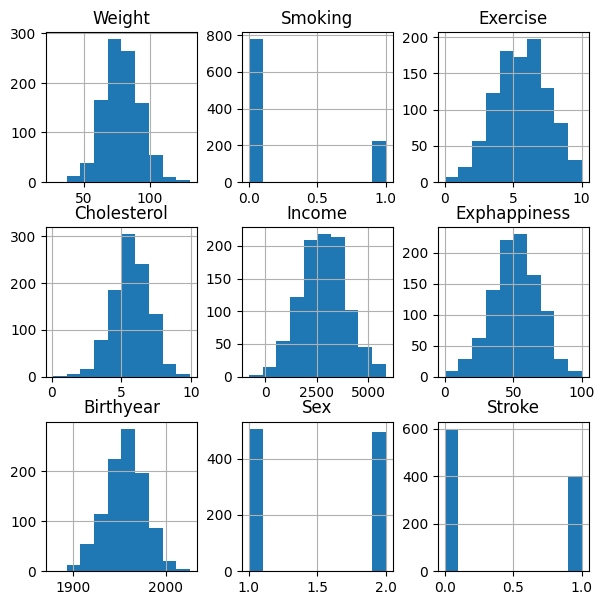

In [187]:
df.hist(figsize=(7,7))
plt.show()

In [188]:
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,78.752000,0.223000,5.119000,5.658400,2827.990000,51.024000,1955.716000,1.494000,0.400000
std,13.939038,0.416467,1.924199,1.312262,1105.714549,16.805888,21.149341,0.500214,0.490143
min,27.000000,0.000000,0.000000,0.100000,-790.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2087.500000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2830.000000,51.000000,1957.000000,1.000000,0.000000
75%,88.000000,0.000000,6.000000,6.500000,3562.500000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2026.000000,2.000000,1.000000


In [189]:
df = df[df["Income"]> 0]
df.shape

(995, 9)

In [190]:
df.describe()

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,78.712563,0.223116,5.124623,5.651658,2843.477387,51.079397,1955.903518,1.495477,0.400000
std,13.943108,0.416545,1.926347,1.309155,1086.437503,16.812336,21.012709,0.500231,0.490144
min,27.000000,0.000000,0.000000,0.100000,50.000000,0.000000,1878.000000,1.000000,0.000000
25%,70.000000,0.000000,4.000000,4.800000,2100.000000,40.000000,1942.000000,1.000000,0.000000
50%,78.000000,0.000000,5.000000,5.600000,2840.000000,51.000000,1957.000000,1.000000,0.000000
75%,87.500000,0.000000,6.000000,6.500000,3570.000000,62.000000,1971.000000,2.000000,1.000000
max,130.000000,1.000000,10.000000,9.900000,5860.000000,100.000000,2026.000000,2.000000,1.000000


In [191]:
df = df[df["Birthyear"]< 2023]
df.shape

(993, 9)

In [192]:
X = df.iloc[:,:8]
Y = df.iloc[:,8] # vastemuuttuja on positio 8 eli Stroke

In [193]:
reg = LogisticRegression(max_iter=2500)
reg.fit(X,Y)

print("Coefficients: ",reg.coef_)
print("Intercept: ",reg.intercept_)


Coefficients:  [[ 7.51344373e-02  3.28429070e-01 -2.60858805e-01  2.29572715e-01
  -5.50279056e-05  2.03659822e-04  6.72459621e-03 -1.02881671e-01]]
Intercept:  [-19.38905852]


In [194]:
Y_pred = reg.predict(X) #ennusteiden laskeminen X:stä

In [195]:
# consufion matrix todellisista ja ennustetuista arvoista
cm = confusion_matrix(Y,Y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[510  87]
 [146 250]]


In [196]:
accuracy2 = accuracy_score(Y,Y_pred)
print("Accuracy calculated from training set = %.3f" % (accuracy2))

Accuracy calculated from training set = 0.765


In [197]:
print(classification_report(Y, Y_pred, target_names=["ei", "kyllä"]))

              precision    recall  f1-score   support

          ei       0.78      0.85      0.81       597
       kyllä       0.74      0.63      0.68       396

    accuracy                           0.77       993
   macro avg       0.76      0.74      0.75       993
weighted avg       0.76      0.77      0.76       993



In [198]:
reg.score(X,Y)

0.7653575025176234

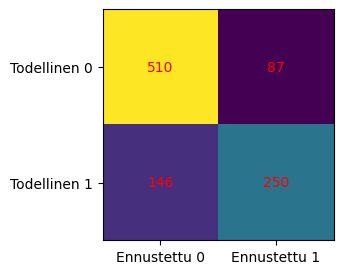

In [199]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Ennustettu 0', 'Ennustettu 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Todellinen 0', 'Todellinen 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [200]:
coff = pd.DataFrame(reg.coef_*100,columns=X.columns).T # T>> transponointi
coff[0].sort_values(ascending=False)

Smoking         32.842907
Cholesterol     22.957271
Weight           7.513444
Birthyear        0.672460
Exphappiness     0.020366
Income          -0.005503
Sex            -10.288167
Exercise       -26.085881
Name: 0, dtype: float64

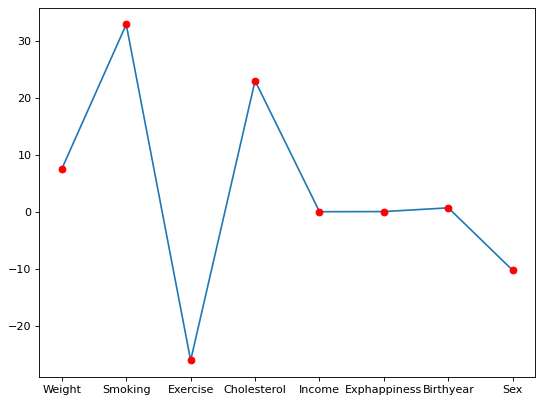

In [201]:
figure(figsize=(8,6), dpi= 80) # voiko kulmakertoimia verrata toisiinsa???
plt.plot(coff, marker="o", mfc="red", mec="red") # markerfacecolor, markeredgecolor
plt.show()

In [202]:
reg.predict_proba(X) # joka rivistä todennäköisyys 100% eli 1

array([[0.02292572, 0.97707428],
       [0.93444391, 0.06555609],
       [0.78050198, 0.21949802],
       ...,
       [0.266664  , 0.733336  ],
       [0.12615427, 0.87384573],
       [0.62332119, 0.37667881]])

In [203]:
# log loss, mahdollisimman lähellä nollaa
logloss= log_loss(Y, reg.predict_proba(X))
logloss

0.47772006819288887

In [204]:
regdata = pd.DataFrame(reg.predict_proba(X)) # edelliset luvut asetettu taulukkoon
regdata

,0,1
0,0.022926,0.977074
1,0.934444,0.065556
2,0.780502,0.219498
3,0.755902,0.244098
4,0.933002,0.066998
...,...,...
988,0.752095,0.247905
989,0.293100,0.706900
990,0.266664,0.733336
991,0.126154,0.873846


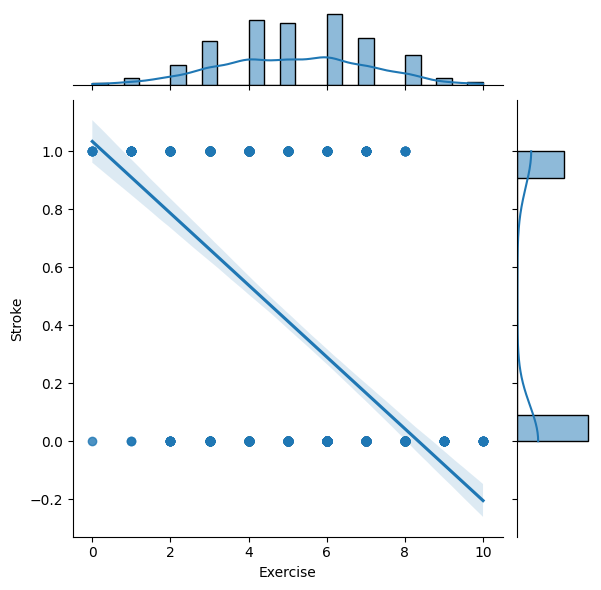

In [205]:
sns.jointplot(x='Exercise', y='Stroke', kind="reg", data=df, palette='rainbow')
plt.show()

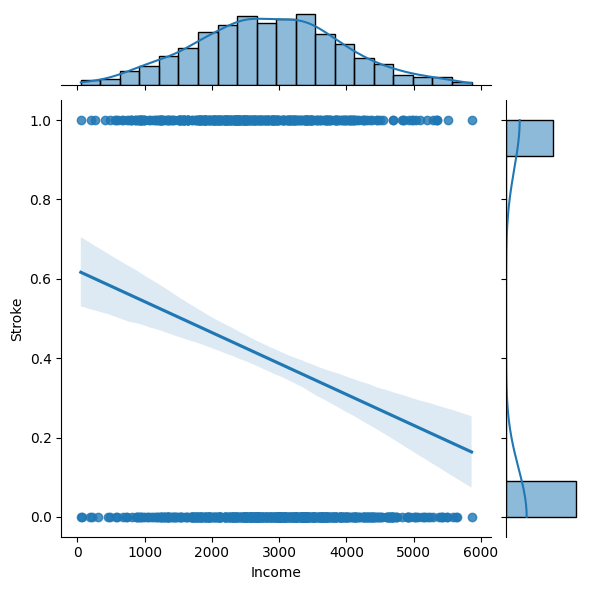

In [206]:
sns.jointplot(x='Income', y='Stroke', kind="reg", data=df, palette='rainbow')
plt.show()

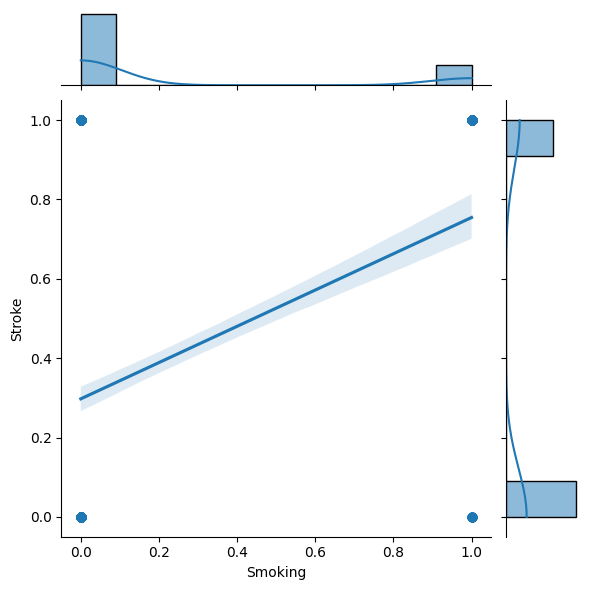

In [207]:
sns.jointplot(x='Smoking', y='Stroke', kind="reg", data=df, palette='rainbow')
plt.show()

Text(0.5, 1.0, 'Tupakointi ja kohtauksen jakautuminen')

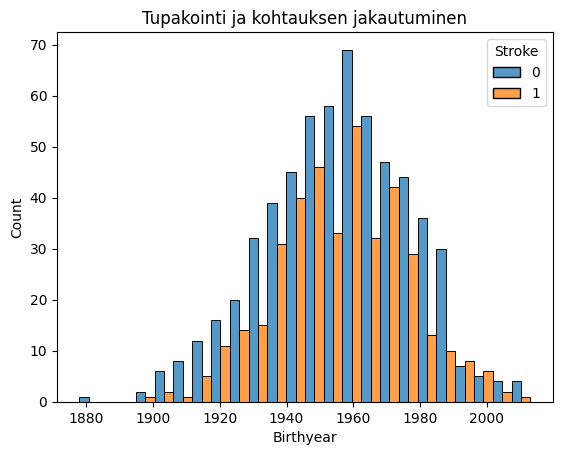

In [208]:
sns.histplot(
    data=df,
    x="Birthyear", 
    hue="Stroke", 
    multiple="dodge"
).set_title("Tupakointi ja kohtauksen jakautuminen")

Text(0.5, 1.0, 'Liikunnan ja kohtauksen jakautuminen')

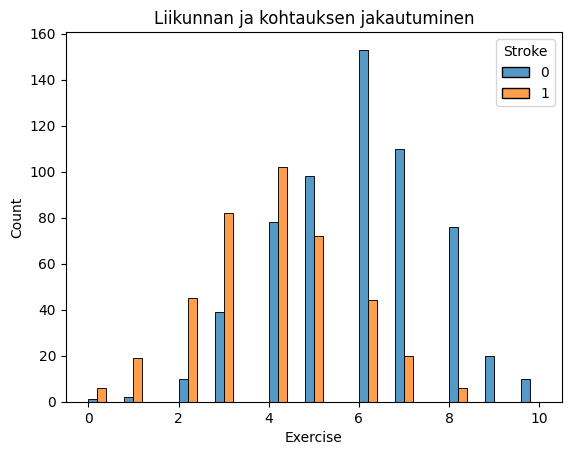

In [209]:
sns.histplot(
    data=df,
    x="Exercise", 
    hue="Stroke", 
    multiple="dodge"
).set_title("Liikunnan ja kohtauksen jakautuminen")

<Axes: >

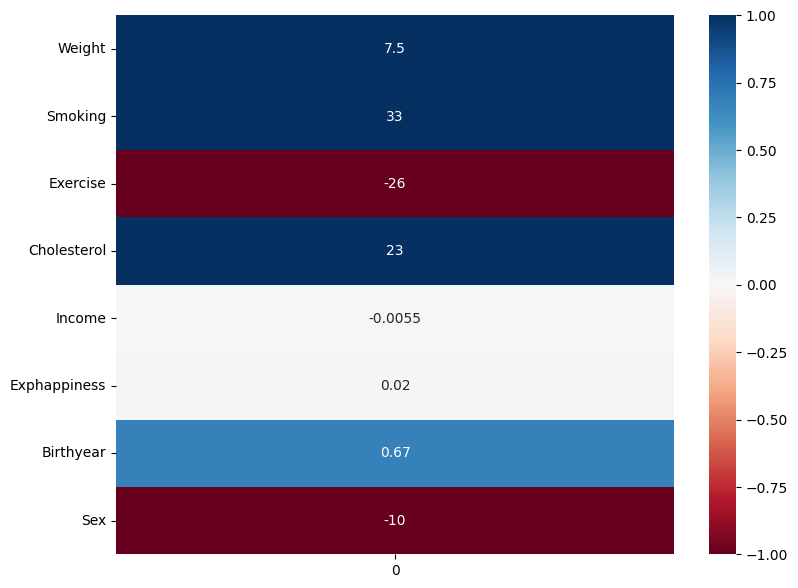

In [ ]:
# HUOM! TEE TÄMÄ UUDELLEEN!!! Muodosta muuttuja korrelaatio
plt.figure(figsize=(9,7)) # 
sns.heatmap(coff,vmin=-1.0,vmax=1.0, cmap='RdBu', annot=True)

In [ ]:
# # Assuming X is a 2D array with one feature (for a simple 2D plot)
# # If X has more than one feature, select one feature for visualization
# X_feature = X[:, 0]  # Adjust as needed to choose the relevant feature

# # Fit logistic regression model
# reg = LogisticRegression(max_iter=2500)
# reg.fit(X, Y)

# # Create a range of values for X to generate a smooth curve
# X_range = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)

# # Predict probabilities for the range of X values
# Y_prob = reg.predict_proba(X_range)[:, 1]  # Probability for the positive class

# # Plot the logistic regression curve
# plt.figure(figsize=(8, 6))
# plt.plot(X_range, Y_prob, color='red', label='Logistic Regression Curve')
# plt.scatter(X_feature, Y, color='blue', alpha=0.5, label='Data Points')  # Plot actual data points
# plt.xlabel("X feature")
# plt.ylabel("Probability")
# plt.legend()
# plt.show()
